## Import libraries

In [1]:
import os
import pandas as pd
from google.colab import drive

## Configure Project Path and other paths

In [2]:
import numpy as np
np.random.seed(72)

In [3]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
proj_path = '/content/drive/MyDrive/Magnimind/Face_detection/MP'
os.chdir(proj_path)

In [5]:
train_csv_path = os.path.join(proj_path, 'train_3D.csv')
test_csv_path = os.path.join(proj_path, 'test_3D.csv')

## Read data from csv to pandas dataframe

In [6]:
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [7]:
train_df.head()

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z
0,/content/drive/MyDrive/Magnimind/Face_detectio...,839,Autistic,0.511593,0.709910,-0.040127,0.517181,0.670308,-0.168715,0.515403,...,-0.057532,0.587559,0.500262,-0.077599,0.768636,0.474503,-0.021161,0.784336,0.468965,-0.021392
1,/content/drive/MyDrive/Magnimind/Face_detectio...,825,Autistic,0.566339,0.733220,-0.065258,0.575596,0.677747,-0.127426,0.568713,...,0.001300,0.609449,0.556148,-0.015839,0.738344,0.541875,0.039996,0.751471,0.531839,0.042270
2,/content/drive/MyDrive/Magnimind/Face_detectio...,817,Autistic,0.437217,0.744490,-0.077209,0.426740,0.685478,-0.165941,0.433244,...,-0.018598,0.488665,0.551752,-0.038808,0.656447,0.535078,0.003090,0.674554,0.525373,0.003349
3,/content/drive/MyDrive/Magnimind/Face_detectio...,845,Autistic,0.533727,0.797597,-0.053682,0.549781,0.762331,-0.169223,0.540980,...,-0.035548,0.601406,0.623819,-0.057016,0.766676,0.603243,0.013871,0.782729,0.596054,0.015662
4,/content/drive/MyDrive/Magnimind/Face_detectio...,844,Autistic,0.524054,0.774706,-0.052582,0.505436,0.710976,-0.152662,0.512779,...,-0.039194,0.528307,0.568924,-0.058087,0.683886,0.525732,-0.016595,0.697740,0.517121,-0.017281


In [8]:
test_df.head()

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z
0,/content/drive/MyDrive/Magnimind/Face_detectio...,100,Autistic,0.727391,0.710138,-0.117875,0.753489,0.581854,-0.193980,0.723864,...,0.048919,0.737665,0.421433,0.016144,0.890724,0.401811,0.169311,0.903891,0.394724,0.177334
1,/content/drive/MyDrive/Magnimind/Face_detectio...,108,Autistic,0.457443,0.710929,-0.091133,0.437796,0.633989,-0.193647,0.445459,...,-0.020685,0.482040,0.471925,-0.044690,0.660659,0.437236,0.013672,0.679693,0.424461,0.015152
2,/content/drive/MyDrive/Magnimind/Face_detectio...,106,Autistic,0.452099,0.779923,-0.042830,0.453784,0.726497,-0.181251,0.455887,...,-0.063696,0.546055,0.521134,-0.084867,0.749610,0.499630,-0.035831,0.771000,0.490222,-0.036383
3,/content/drive/MyDrive/Magnimind/Face_detectio...,1,Autistic,0.457504,0.754957,-0.085740,0.470419,0.687706,-0.211908,0.467041,...,-0.034361,0.565713,0.535771,-0.059295,0.783299,0.529403,0.008190,0.804902,0.522787,0.009052
4,/content/drive/MyDrive/Magnimind/Face_detectio...,103,Autistic,0.362426,0.740446,-0.046425,0.366750,0.668341,-0.156865,0.372543,...,-0.048113,0.491366,0.545638,-0.066218,0.686309,0.559731,-0.032427,0.705237,0.556214,-0.034047


In [9]:
train_df['label'].value_counts()

Autistic        1270
Non_Autistic     810
Name: label, dtype: int64

In [10]:
train_df[train_df.duplicated()]

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z


In [11]:
test_df['label'].value_counts()

Autistic        150
Non_Autistic    150
Name: label, dtype: int64

In [12]:
test_df[test_df.duplicated()]

,img_path,image_num,label,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,...,landmark_464_z,landmark_465_x,landmark_465_y,landmark_465_z,landmark_466_x,landmark_466_y,landmark_466_z,landmark_467_x,landmark_467_y,landmark_467_z


## Setting input features and output features

In [13]:
X = train_df.drop(columns=['img_path', 'image_num', 'label'])
y = train_df['label']

In [14]:
y.value_counts()

Autistic        1270
Non_Autistic     810
Name: label, dtype: int64

In [15]:
y = y.map({'Autistic': 1, 'Non_Autistic': 0})

In [16]:
y.value_counts()

1    1270
0     810
Name: label, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, shuffle=True, random_state=72)

In [18]:
X_test = test_df.drop(columns=['img_path', 'image_num', 'label'])
y_test = test_df['label']
y_test = y_test.map({'Autistic': 1, 'Non_Autistic': 0})

In [19]:
X_train.shape

(1560, 1404)

In [20]:
X_val.shape

(520, 1404)

In [21]:
X_test.shape

(300, 1404)

## PCA transformation applied on input data

In [22]:
from sklearn.decomposition import PCA

# Dimensionality reduction using PCA

# Totally there are 936 features.
# We select the following number of features for checking the explained variance.
components = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
exp_var = []

# Find the optimal number of components for dimensionality reduction.
for comp in components:
    pca = PCA(n_components=comp)
    pca.fit(X_train)
    var_exp = pca.explained_variance_ratio_.sum()
    exp_var.append(var_exp)


In [23]:
import matplotlib.pyplot as plt

def plt_explained_variance(x=components, y=exp_var):
    fig, ax = plt.subplots(figsize=(6,3))
    plt.plot(x, y)
    plt.xlabel('Number of components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance')
    for index in range(len(x)):
        ax.text(x[index], y[index], round(y[index],2), size=12)

    plt.show()

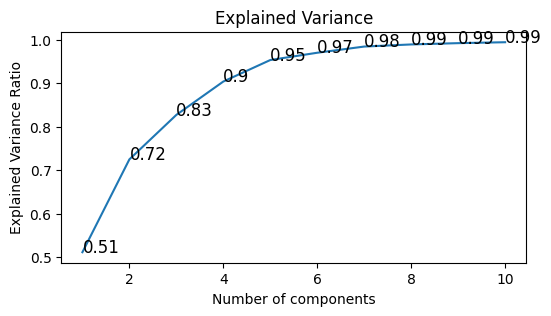

In [24]:
plt_explained_variance(components, exp_var)

In [25]:
num_components = 8

In [26]:
pca = PCA(n_components=num_components)
pca.fit(X_train)

PCA(n_components=8)

In [27]:
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

## Model Building

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import precision_recall_curve
import numpy as np
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import hyperopt

In [29]:
# Initializing random_state
random_state = 72

In [30]:
from hyperopt.pyll.base import Apply

def hyperopt_indices_to_values(space, best):
    best_params = {}

    for key, val in best.items():
        print(f"Processing key: {key}, val: {val}")  # Debugging line
        #print(f"Type of space[key]: {type(space[key])}")  # Additional Debugging line
        #print(f"Name attribute of space[key] (if exists): {getattr(space[key], 'name', 'No name attribute')}")  # Additional Debugging line

        if key == 'penalty_solver':
            # Extract penalty and solver values directly from the tuple
            penalty, solver = space[key].pos_args[int(val) + 1].pos_args
            best_params['penalty'] = penalty.obj
            best_params['solver'] = solver.obj

        elif isinstance(space[key], Apply) and space[key].name == 'switch':
            # This means the parameter is defined using hp.choice
            selected_item = space[key].pos_args[val + 1]
            if key == 'hidden_layers':
                try:
                    # Attempt to unpack it as if it was a list
                    best_params[key] = [item.obj for item in selected_item.pos_args]
                except AttributeError:
                    # If there's an error, revert back to previous handling
                    best_params[key] = getattr(selected_item, 'obj', selected_item)

            else:
                # Handle the scenario where 'selected_item' might not have 'obj'
                best_params[key] = getattr(selected_item, 'obj', selected_item)

        else:
            # Otherwise, directly assign the value
            best_params[key] = val

    return best_params


In [57]:
def optimize_hyperparams(model_class, default_params, space,
                         X_train, y_train, enable_early_stopping=False,
                         max_evals=20, random_state=72):

        # Convert numpy arrays to pandas DataFrame or Series
    if isinstance(X_train, np.ndarray):
        X_train = pd.DataFrame(X_train)
    if isinstance(y_train, np.ndarray):
        y_train = pd.Series(y_train)

    def objective(params):
        try:
            # If 'penalty_solver' is in params, get mapped 'penalty' and 'solver' params
            if 'penalty_solver' in params:
                params['penalty'], params['solver'] = params.pop('penalty_solver')

            # If the penalty is not 'elasticnet', remove the l1_ratio parameter
            if params.get('penalty') != 'elasticnet':
                params.pop('l1_ratio', None)


            all_params = {**default_params, **params}
            m = model_class(**all_params)

            cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

            if enable_early_stopping:
                # Set early_stopping_rounds
                m.set_params(early_stopping_rounds=3, eval_metric="logloss")
                scores = []

                for train_index, test_index in cv_folds.split(X_train, y_train):
                    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
                    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

                    eval_set = [(X_val_fold, y_val_fold)]
                    m.fit(X_train_fold, y_train_fold,
                          eval_set=eval_set, verbose=True)

                    predictions = m.predict(X_val_fold)
                    score = f1_score(y_val_fold, predictions)
                    scores.append(score)

                return -np.mean(scores) # since we want to maximize F1 score

            else:
                loss = -cross_val_score(m, X_train, y_train, cv=cv_folds, scoring='f1').mean()
                return loss

        except Exception as e:
            print(f"Exception encountered: {e}")
            # Handle any other exception that arises during model training or evaluation
            return float('inf')

    trials = Trials()
    best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=max_evals, trials=trials)
    best_params = hyperopt_indices_to_values(space, best)

    return best_params


In [58]:
# Evaluate the fitted pipeline
def evaluate(model, X, y):
    # Predict on given X
    y_pred = model.predict(X)

    # Calculate below evaluation metrics
    accuracy = round(accuracy_score(y, y_pred), 2)
    precision = round(precision_score(y, y_pred), 2)
    recall = round(recall_score(y, y_pred), 2)
    f1 = round(f1_score(y, y_pred), 2)

    # Return the values in a dictionary

    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, 'F1': f1}

In [59]:
default_params = {
    'random_state': random_state,
    'max_iter': 3000,
    'class_weight': 'balanced',
}

lr_hyperparam_space = {
    # Combine penalty and solver
    'penalty_solver': hp.choice('penalty_solver', [
        ('l1', 'liblinear'),
        ('l2', 'lbfgs'),
        ('l2', 'liblinear'),
        ('elasticnet', 'saga')
    ]),

    # Regularization strength
    'C': hp.loguniform('C', np.log(0.0001), np.log(100)),
    'l1_ratio': hp.uniform('l1_ratio', 0, 1),

}

# Using the function
best_params = optimize_hyperparams(LogisticRegression,
                                   default_params,
                                   lr_hyperparam_space,
                                   X_train_pca, y_train,
                                   max_evals=35)
print(best_params)

100%|██████████| 35/35 [00:03<00:00,  9.89trial/s, best loss: -0.7494278788368598]
Processing key: C, val: 0.8571220723117424
Processing key: l1_ratio, val: 0.941057723513887
Processing key: penalty_solver, val: 3
{'C': 0.8571220723117424, 'l1_ratio': 0.941057723513887, 'penalty': 'elasticnet', 'solver': 'saga'}


In [60]:
optimized_params = {**default_params, **best_params}
print(optimized_params)

# Train the model using the parameters obtained from hyperparam tuning
lr = LogisticRegression(**optimized_params)
lr.fit(X_train_pca, y_train)

# Evaluate on the training data
train_results = evaluate(lr, X_train_pca, y_train)
print("Training Data Evaluation:")
print(train_results)

# Evaluate on the validation data
validation_results = evaluate(lr, X_val_pca, y_val)
print("\nValidation Data Evaluation:")
print(validation_results)

# Evaluate on the test data
test_results = evaluate(lr, X_test_pca, y_test)
print("\nTest Data Evaluation:")
print(test_results)

{'random_state': 72, 'max_iter': 3000, 'class_weight': 'balanced', 'C': 0.8571220723117424, 'l1_ratio': 0.941057723513887, 'penalty': 'elasticnet', 'solver': 'saga'}
Training Data Evaluation:
{'Accuracy': 0.71, 'Precision': 0.79, 'Recall': 0.73, 'F1': 0.76}

Validation Data Evaluation:
{'Accuracy': 0.7, 'Precision': 0.8, 'Recall': 0.68, 'F1': 0.73}

Test Data Evaluation:
{'Accuracy': 0.73, 'Precision': 0.72, 'Recall': 0.74, 'F1': 0.73}


In [61]:
rf_default_params = {
    'random_state': random_state,
    'class_weight': 'balanced',
    'n_jobs': -1,
}

rf_hyperparam_space = {
    'n_estimators': hp.choice('n_estimators', list(range(50, 120, 10))),
    'max_depth': hp.choice('max_depth', list(range(2, 6))),  # Excluding None to prevent unlimited depth
    'min_samples_split': hp.uniform('min_samples_split', 0.01, 0.1),  # Increasing the lower bound to avoid tiny splits
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.005, 0.05),  # Increasing the lower bound to ensure larger leaves
    'max_features': hp.choice('max_features', [0.3, 0.4, 0.5, 'sqrt', 'log2']),  # Focusing on fewer feature options
    'criterion': hp.choice('criterion', ['gini', 'entropy']),
    'bootstrap': hp.choice('bootstrap', [True]),
    'oob_score': hp.choice('oob_score', [True, False])
}

# Using the function
rf_best_params = optimize_hyperparams(RandomForestClassifier,
                                      rf_default_params,
                                      rf_hyperparam_space,
                                      X_train_pca, y_train,
                                      max_evals=35)
print(rf_best_params)

100%|██████████| 35/35 [00:57<00:00,  1.63s/trial, best loss: -0.7505607192045208]
Processing key: bootstrap, val: 0
Processing key: criterion, val: 1
Processing key: max_depth, val: 3
Processing key: max_features, val: 4
Processing key: min_samples_leaf, val: 0.039067956369870406
Processing key: min_samples_split, val: 0.03933012001832201
Processing key: n_estimators, val: 4
Processing key: oob_score, val: 0
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 0.039067956369870406, 'min_samples_split': 0.03933012001832201, 'n_estimators': 90, 'oob_score': True}


In [62]:
rf_optimized_params = {**rf_default_params, **rf_best_params}
print(rf_optimized_params)

# Train the model using the parameters obtained from hyperparam tuning
rf = RandomForestClassifier(**rf_optimized_params)
rf.fit(X_train_pca, y_train)

# Evaluate on the training data
train_results = evaluate(rf, X_train_pca, y_train)
print("Training Data Evaluation:")
print(train_results)

# Evaluate on the validation data
validation_results = evaluate(rf, X_val_pca, y_val)
print("\nValidation Data Evaluation:")
print(validation_results)

# Evaluate on the test data
test_results = evaluate(rf, X_test_pca, y_test)
print("\nTest Data Evaluation:")
print(test_results)

{'random_state': 72, 'class_weight': 'balanced', 'n_jobs': -1, 'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 0.039067956369870406, 'min_samples_split': 0.03933012001832201, 'n_estimators': 90, 'oob_score': True}
Training Data Evaluation:
{'Accuracy': 0.74, 'Precision': 0.8, 'Recall': 0.77, 'F1': 0.78}

Validation Data Evaluation:
{'Accuracy': 0.73, 'Precision': 0.8, 'Recall': 0.74, 'F1': 0.77}

Test Data Evaluation:
{'Accuracy': 0.74, 'Precision': 0.72, 'Recall': 0.79, 'F1': 0.75}


In [63]:
adb_default_params = {
    'random_state': random_state,
}

adb_hyperparam_space = {
    # AdaBoost hyperparameters
    # Number of weak learners to train
    'n_estimators': hp.choice('n_estimators', list(range(30, 100, 10))),
    # Helps to shrink the contribution of each classifier
    'learning_rate': hp.loguniform('learning_rate', -7, 0), # Log uniform distribution between 1e-7 and 1
}

# Using the function
adb_best_params = optimize_hyperparams(AdaBoostClassifier,
                                       adb_default_params,
                                       adb_hyperparam_space,
                                       X_train_pca, y_train,
                                       max_evals=30)
print(adb_best_params)

100%|██████████| 30/30 [00:34<00:00,  1.16s/trial, best loss: -0.792632591467668]
Processing key: learning_rate, val: 0.1285762099735542
Processing key: n_estimators, val: 4
{'learning_rate': 0.1285762099735542, 'n_estimators': 70}


In [64]:
# Merge default and best params
adb_optimized_params = {**adb_default_params, **adb_best_params}
print(adb_optimized_params)

# Train the model using the optimized parameters
adb = AdaBoostClassifier(**adb_optimized_params)
adb.fit(X_train_pca, y_train)

# Evaluate on the training data
train_results = evaluate(adb, X_train_pca, y_train)
print("Training Data Evaluation:")
print(train_results)

# Evaluate on the validation data
validation_results = evaluate(adb, X_val_pca, y_val)
print("\nValidation Data Evaluation:")
print(validation_results)

# Evaluate on the test data
test_results = evaluate(adb, X_test_pca, y_test)
print("\nTest Data Evaluation:")
print(test_results)

{'random_state': 72, 'learning_rate': 0.1285762099735542, 'n_estimators': 70}
Training Data Evaluation:
{'Accuracy': 0.76, 'Precision': 0.77, 'Recall': 0.86, 'F1': 0.81}

Validation Data Evaluation:
{'Accuracy': 0.73, 'Precision': 0.76, 'Recall': 0.81, 'F1': 0.79}

Test Data Evaluation:
{'Accuracy': 0.7, 'Precision': 0.65, 'Recall': 0.88, 'F1': 0.75}


In [97]:
xgb_default_params = {
    'random_state': random_state,
    'n_jobs': -1,
}

# Hyperparams for XGB
xgb_hyperparam_space = {
    'learning_rate': hp.loguniform('learning_rate', -5, -3),  # remain the same
    'n_estimators': hp.choice('n_estimators', [10, 20, 30]),  # even more reduced choices
    'max_depth': hp.choice('max_depth', [1, 2]),  # remain the same
    'min_child_weight': hp.quniform('min_child_weight', 16, 20, 1),  # remain the same
    'gamma': hp.uniform('gamma', 0.7, 1),  # remain the same
    'colsample_bytree': hp.uniform('colsample_bytree', 0.2, 0.5),  # remain the same
    'alpha': hp.loguniform('alpha', 0, 4),  # more aggressive L1 regularization
    'lambda': hp.loguniform('lambda', 0, 4),  # more aggressive L2 regularization
    'subsample': hp.uniform('subsample', 0.3, 0.7),  # remain the same
    'scale_pos_weight': hp.uniform('scale_pos_weight', 0.5, 1.5)  # reducing the influence of positive class
}


# Using the function
xgb_best_params = optimize_hyperparams(XGBClassifier,
                                       xgb_default_params,
                                       xgb_hyperparam_space,
                                       X_train_pca, y_train,
                                       enable_early_stopping=True,
                                       max_evals=35)
print(xgb_best_params)


[0]	validation_0-logloss:0.67106
[1]	validation_0-logloss:0.67035
[2]	validation_0-logloss:0.67038
[3]	validation_0-logloss:0.66987
[4]	validation_0-logloss:0.66945
[5]	validation_0-logloss:0.66899
[6]	validation_0-logloss:0.66858
[7]	validation_0-logloss:0.66854
[8]	validation_0-logloss:0.66808
[9]	validation_0-logloss:0.66804
[10]	validation_0-logloss:0.66747
[11]	validation_0-logloss:0.66689
[12]	validation_0-logloss:0.66629
[13]	validation_0-logloss:0.66593
[14]	validation_0-logloss:0.66523
[15]	validation_0-logloss:0.66519
[16]	validation_0-logloss:0.66465
[17]	validation_0-logloss:0.66463
[18]	validation_0-logloss:0.66410
[19]	validation_0-logloss:0.66359
[0]	validation_0-logloss:0.67112
[1]	validation_0-logloss:0.67044
[2]	validation_0-logloss:0.67044
[3]	validation_0-logloss:0.67011
[4]	validation_0-logloss:0.66985
[5]	validation_0-logloss:0.66944
[6]	validation_0-logloss:0.66914
[7]	validation_0-logloss:0.66914
[8]	validation_0-logloss:0.66881
[9]	validation_0-logloss:0.66882


In [98]:
# Merge default and best params
xgb_optimized_params = {**xgb_default_params, **xgb_best_params}
print(xgb_optimized_params)

# Train the model using the optimized parameters
xgb = XGBClassifier(**xgb_optimized_params)
xgb.fit(X_train_pca, y_train)

# Evaluate on the training data
train_results = evaluate(xgb, X_train_pca, y_train)
print("Training Data Evaluation:")
print(train_results)

# Evaluate on the validation data
validation_results = evaluate(xgb, X_val_pca, y_val)
print("\nValidation Data Evaluation:")
print(validation_results)

# Evaluate on the test data
test_results = evaluate(xgb, X_test_pca, y_test)
print("\nTest Data Evaluation:")
print(test_results)

{'random_state': 72, 'n_jobs': -1, 'alpha': 19.782054710513684, 'colsample_bytree': 0.4653903616818422, 'gamma': 0.7441657239769018, 'lambda': 37.09342574337466, 'learning_rate': 0.0266190216178419, 'max_depth': 2, 'min_child_weight': 17.0, 'n_estimators': 20, 'scale_pos_weight': 0.6873603894652254, 'subsample': 0.5199557529706892}
Training Data Evaluation:
{'Accuracy': 0.73, 'Precision': 0.72, 'Recall': 0.91, 'F1': 0.8}

Validation Data Evaluation:
{'Accuracy': 0.72, 'Precision': 0.72, 'Recall': 0.88, 'F1': 0.79}

Test Data Evaluation:
{'Accuracy': 0.68, 'Precision': 0.62, 'Recall': 0.91, 'F1': 0.74}


In [99]:
# Import necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [100]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping
from keras import backend as K
from keras.metrics import Metric, Precision, Recall

class F1Score(Metric):
    def __init__(self, name="f1_score", **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.f1 = self.add_weight(name="f1", initializer="zeros")
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)
        p = self.precision.result()
        r = self.recall.result()
        # Compute F1 Score
        self.f1.assign(2 * ((p * r) / (p + r + K.epsilon())))

    def result(self):
        return self.f1

    def reset_state(self):
        self.f1.assign(0.)
        self.precision.reset_state()
        self.recall.reset_state()


def optimize_hyperparams_mlp(space, X_train, y_train, X_val, y_val, enable_early_stopping=True, max_evals=25, random_state=72):

    def objective(params):
        try:
            # Build the model
            model = Sequential()
            model.add(Dense(params['hidden_layers'][0],
                            activation='relu',
                            input_dim=X_train.shape[1]))

            model.add(Dropout(params['dropout']))
            for units in params['hidden_layers'][1:]:
                model.add(Dense(units, activation='relu'))
                model.add(Dropout(params['dropout']))
            model.add(Dense(1, activation='sigmoid'))  # for binary classification

            if params['optimizer'] == 'adam':
                opt = Adam(learning_rate=params['learning_rate'])
            else:
                opt = SGD(learning_rate=params['learning_rate'])

            model.compile(optimizer=opt, loss='binary_crossentropy',
                          metrics=['accuracy', Precision(), Recall(), F1Score()])

            # Set early stopping
            if enable_early_stopping:
                callbacks = [EarlyStopping(monitor='val_loss', patience=5)]
            else:
                callbacks = None

            # Train the model
            model.fit(X_train, y_train, epochs=35,
                      batch_size=int(params['batch_size']),
                      verbose=0, validation_data=(X_val, y_val),
                      callbacks=callbacks)

            # Evaluate the model
            _, accuracy, precision, recall, f1_val = model.evaluate(X_val, y_val, verbose=0)

            return -f1_val  # we want to maximize accuracy, hence the negative sign

        except Exception as e:
            print(f"Exception encountered: {e}")
            return float('inf')

    trials = Trials()
    best = fmin(fn=objective, space=space, algo=tpe.suggest,
                max_evals=max_evals, trials=trials)
    best_params = hyperopt_indices_to_values(space, best)

    return best_params



In [101]:
from hyperopt import hp
from hyperopt import Trials, fmin, tpe

# Define the space
mlp_hyperparam_space = {
    'learning_rate': hp.loguniform('learning_rate', -5, -2),
    'batch_size': hp.choice('batch_size', [32, 64, 128, 256]),
    'hidden_layers': hp.choice('hidden_layers', [
        [16],
        [32],
        [64],
        [128],
        [16, 16],
        [32, 32],
        [64, 64],
        [128, 128],
        [128, 64],
        [64, 32],
        [32, 16],
        [128, 64, 32, 16],
        [128, 64, 32]
    ]),
    'optimizer': hp.choice('optimizer', ['adam', 'sgd']),
    'dropout': hp.uniform('dropout', 0, 0.5)
}

# Use the function
mlp_best_params = optimize_hyperparams_mlp(space=mlp_hyperparam_space,
                                           X_train=X_train_pca,
                                           y_train=y_train,
                                           X_val=X_val_pca, y_val=y_val,
                                           enable_early_stopping=True,
                                           max_evals=35)
print(mlp_best_params)


100%|██████████| 35/35 [02:58<00:00,  5.10s/trial, best loss: -0.830028235912323]
Processing key: batch_size, val: 2
Processing key: dropout, val: 0.33602106504312773
Processing key: hidden_layers, val: 7
Processing key: learning_rate, val: 0.011864447809422743
Processing key: optimizer, val: 0
{'batch_size': 128, 'dropout': 0.33602106504312773, 'hidden_layers': [128, 128], 'learning_rate': 0.011864447809422743, 'optimizer': 'adam'}


In [102]:
# Evaluate the fitted pipeline
def evaluate_mlp(model, X, y):
    # Evaluate on given X
    _, accuracy, precision, recall, f1 = model.evaluate(X, y)

    # Return the values in a dictionary
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, 'F1': f1}

In [103]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD

model = Sequential()

hidden_layers = mlp_best_params['hidden_layers']

print(hidden_layers)
for units in hidden_layers:
    model.add(Dense(units, activation='relu'))
    model.add(Dropout(mlp_best_params['dropout']))


# Output layer
model.add(Dense(1, activation='sigmoid'))

# Determine optimizer based on the optimized parameters
if mlp_best_params['optimizer'] == 'adam':
    optimizer = Adam(learning_rate=mlp_best_params['learning_rate'])
elif mlp_best_params['optimizer'] == 'sgd':
    optimizer = SGD(learning_rate=mlp_best_params['learning_rate'])

callbacks = [EarlyStopping(monitor='val_loss', patience=5)]

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), F1Score()])
model.fit(X_train_pca, y_train,
          validation_data=(X_val_pca, y_val),
          epochs=mlp_best_params.get('epochs', 35),
          batch_size=mlp_best_params['batch_size'],
          callbacks=callbacks, verbose=0)


# Evaluate the trained model
train_results = {}
train_results = evaluate_mlp(model, X_train_pca, y_train)
print("Training Data Evaluation:")
print(train_results)

validation_results = evaluate_mlp(model, X_val_pca, y_val)
print("\nValidation Data Evaluation:")
print(validation_results)

test_results = evaluate_mlp(model, X_test_pca, y_test)
print("\nTest Data Evaluation:")
print(test_results)


[128, 128]
49/49 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.7712 - precision_70: 0.7665 - recall_70: 0.8993 - f1_score: 0.8276
Training Data Evaluation:
{'Accuracy': 0.7711538672447205, 'Precision': 0.7665473818778992, 'Recall': 0.899265468120575, 'F1': 0.8276193737983704}
17/17 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7519 - precision_70: 0.7611 - recall_70: 0.8644 - f1_score: 0.8095

Validation Data Evaluation:
{'Accuracy': 0.7519230842590332, 'Precision': 0.7611111402511597, 'Recall': 0.8643532991409302, 'F1': 0.8094534277915955}
10/10 [==============================] - 0s 3ms/step - loss: 0.5386 - accuracy: 0.6800 - precision_70: 0.6324 - recall_70: 0.8600 - f1_score: 0.7288

Test Data Evaluation:
{'Accuracy': 0.6800000071525574, 'Precision': 0.6323529481887817, 'Recall': 0.8600000143051147, 'F1': 0.7288135290145874}
